In [1]:
import os
import copy
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# RDKit
import rdkit
from rdkit import Chem
from rdkit.Chem.rdmolfiles import MolFromXYZFile
from rdkit.Chem import rdDetermineBonds, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
rdkit.__version__

'2023.09.1'

In [2]:
# Path to main folder where all the data is
folder_path = '../GNN_XAS_Node/raw_data/OPT_output'
# Create a list with the path of all the different molecule folders
subdirs = [os.path.join(folder_path, d) for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

print(len(subdirs))
print(subdirs)

92
['../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_0_eKETO_0_iOH_2_iEPOXY_0_ieEPOXY_2_2', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_0_eKETO_0_iOH_0_iEPOXY_1_ieEPOXY_3_0', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_3_ieEPOXY_0_2', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_1_iEPOXY_1_ieEPOXY_0_1', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_2_eKETO_0_iOH_1_iEPOXY_1_ieEPOXY_0_1', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_2_iEPOXY_1_ieEPOXY_0_0', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_1_eKETO_1_iOH_1_iEPOXY_2_ieEPOXY_0_0', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__2_eEPOXY_0_eCHO_0_eKETO_0_iOH_3_iEPOXY_0_ieEPOXY_0_1', '../GNN_XAS_Node/raw_data/OPT_output/cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_2_ieEPOXY_1_1

In [3]:
foldername = []
# Split up the into the directory path and list of all the folder/molecule names
for subdir in subdirs:
    dirpath, temp = os.path.split(subdir)
    foldername.append(temp)

print(len(foldername))
print(foldername)
print(dirpath)

92
['cir_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_0_eKETO_0_iOH_2_iEPOXY_0_ieEPOXY_2_2', 'cir_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_0_eKETO_0_iOH_0_iEPOXY_1_ieEPOXY_3_0', 'cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_3_ieEPOXY_0_2', 'cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_1_iEPOXY_1_ieEPOXY_0_1', 'cir_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_2_eKETO_0_iOH_1_iEPOXY_1_ieEPOXY_0_1', 'cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_2_iEPOXY_1_ieEPOXY_0_0', 'cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_1_eKETO_1_iOH_1_iEPOXY_2_ieEPOXY_0_0', 'cir_R_eOH_0_eCOOH__2_eEPOXY_0_eCHO_0_eKETO_0_iOH_3_iEPOXY_0_ieEPOXY_0_1', 'cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_2_ieEPOXY_1_1', 'cir_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_1_eKETO_0_iOH_0_iEPOXY_1_ieEPOXY_2_2', 'cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_1_eKETO_3_iOH_0_iEPOXY_0_ieEPOXY_0_2', 'cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_0_eKETO_1_iOH_1_iEPOXY_2_ieEPOXY_0_0', 'cir_R_eOH_1_eCOOH__1_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_1', 'cir_R_eOH_0_eCOOH__0

In [4]:
pattern = r'OPT_[\w]+\.xyz'
xyz_files = []
# Loop through all the molecule folders and get the OPT.xyz files
for subdir in subdirs:
    files = [f for f in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, f))]

    for filename in files:
        if re.match(pattern, filename):
            xyz_file = filename
            xyz_files.append(xyz_file)

print(xyz_files)

['OPT_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_0_eKETO_0_iOH_2_iEPOXY_0_ieEPOXY_2_2.xyz', 'OPT_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_0_eKETO_0_iOH_0_iEPOXY_1_ieEPOXY_3_0.xyz', 'OPT_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_3_ieEPOXY_0_2.xyz', 'OPT_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_1_iEPOXY_1_ieEPOXY_0_1.xyz', 'OPT_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_2_eKETO_0_iOH_1_iEPOXY_1_ieEPOXY_0_1.xyz', 'OPT_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_2_iEPOXY_1_ieEPOXY_0_0.xyz', 'OPT_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_1_eKETO_1_iOH_1_iEPOXY_2_ieEPOXY_0_0.xyz', 'OPT_R_eOH_0_eCOOH__2_eEPOXY_0_eCHO_0_eKETO_0_iOH_3_iEPOXY_0_ieEPOXY_0_1.xyz', 'OPT_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_2_ieEPOXY_1_1.xyz', 'OPT_R_eOH_0_eCOOH__0_eEPOXY_1_eCHO_1_eKETO_0_iOH_0_iEPOXY_1_ieEPOXY_2_2.xyz', 'OPT_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_1_eKETO_3_iOH_0_iEPOXY_0_ieEPOXY_0_2.xyz', 'OPT_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_0_eKETO_1_iOH_1_iEPOXY_2_ieEPOXY_0_0.xyz', 'OPT_R_eOH_1_eCOOH__1_eEPOXY_0_eCHO_0_eKETO_0_iOH_0

In [7]:
def rearrange_xyz(path, filename):

    '''
    Function that rearranges the given .xyz file to move all the
    oxygen and hydrogen atoms to the bottom of the file
    '''

    with open(os.path.join(path, filename), 'r') as fr:
        lines = fr.readlines()
        o_lines = []
        h_lines = []

        for line in lines:
            if line.startswith('  O'):
                o_lines.append(line)
            elif line.startswith('  H'):
                h_lines.append(line)

        with open(os.path.join(path, filename), 'w') as fw:

            for line in lines:
                if line.startswith('  H'):
                    pass
                elif line.startswith('  O'):
                    pass
                else:
                    fw.write(line)
        
            for x in o_lines:
                fw.write(x)

            for y in h_lines:
                fw.write(y)

In [8]:
# Run the rearrange_xyz function on all the molecules
for subdir, f in zip(subdirs, xyz_files):
    rearrange_xyz(subdir, f)

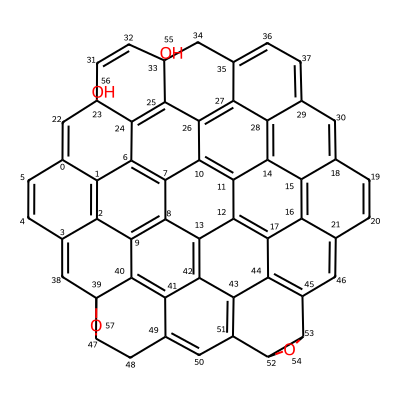

In [12]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.molSize = 400,400

raw_mol = MolFromXYZFile(os.path.join(subdirs[0], xyz_files[0]))
conn_mol = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineBonds(conn_mol)
mol = copy.deepcopy(conn_mol)
mol = Chem.RemoveAllHs(mol)
Chem.RemoveStereochemistry(mol)
mol

In [11]:
smi = Chem.MolToSmiles(mol)
print(smi)

O=CC1=Cc2cc3c(C(=O)O)cc4cc5ccc6cc7ccc8cc9cc(C=O)c%10c%11c9c9c%12c%13c%14c%15c(c2C2%16OC12C=C1C=CC(=C%10)C(O)(C1=C%14%16)C%11%13)c3c4c1c5c6c(c7c89)c%12c%151


In [12]:
with open('../GNN_XAS_Node/raw_data/test.xyz', 'r') as file:
    data = file.readlines()

print(data)

['83\n', 'Coordinates from ORCA-job OPT_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_1_iEPOXY_1_ieEPOXY_0_1\n', '  C   -0.04470237250613      1.46539013107944      0.20915621791244\n', '  C   1.19962995834926      0.73051860458417      0.22044776511621\n', '  C   1.17775826288472     -0.68506388640058      0.27643298512873\n', '  C   -0.03804967304306     -1.40360789243350      0.31302493832502\n', '  C   -1.27734483386023     -0.66135241432792      0.28121683470595\n', '  C   -1.25979410862298      0.73155690065079      0.23872425054760\n', '  C   2.44384731619370      1.45128467332037      0.17667036800653\n', '  C   3.69753657304865      0.73397768428040      0.12407205100177\n', '  C   3.71809267926845     -0.67982300996395      0.13423625722946\n', '  C   2.46372373702525     -1.45688972623690      0.41939443114261\n', '  C   4.92910565973381      1.45446394155351      0.04650233093920\n', '  C   6.16723666631442      0.74194693504863     -0.00993485502208\n', '  C   6.17235553334

In [13]:
def rearrange_xyz(filename):

    with open(filename, 'r') as fr:
        lines = fr.readlines()
        o_lines = []
        h_lines = []

        for line in lines:
            if line.startswith('  O'):
                o_lines.append(line)
            elif line.startswith('  H'):
                h_lines.append(line)

        with open(filename, 'w') as fw:

            for line in lines:
                if line.startswith('  H'):
                    pass
                elif line.startswith('  O'):
                    pass
                else:
                    fw.write(line)
        
            for x in o_lines:
                fw.write(x)

            for y in h_lines:
                fw.write(y)

In [14]:
name = '../GNN_XAS_Node/raw_data/test.xyz'

rearrange_xyz(name)